### Neural Network Model with a Single Perceptron and One Input Node

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression

2024-05-14 21:23:00.048998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X, y = make_regression(n_samples=30, n_features=1, random_state=1, noise=20)

X = X.T
y = np.reshape(y, (1, -1))

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(y.shape))

The shape of X is: (1, 30)
The shape of Y is: (1, 30)


In [3]:
def initialize_parameters(n_x, n_y):
    
    W = tf.Variable(tf.random.uniform((n_y, n_x)) * 0.5)
    b = tf.Variable(tf.random.uniform((n_y, 1)) * 0.5)

    return W, b

In [4]:
def forward_propagation(X, W, b):
    y_hat = W @ X + b
    return y_hat

In [5]:
def compute_cost(y, y_hat):
    cost = tf.reduce_mean((y - y_hat) ** 2) / 2
    return cost

In [6]:
def gradiant_descent(W, b, dj_dw, dj_db, learning_rate):
    W.assign_sub(learning_rate * dj_dw)
    b.assign_sub(learning_rate * dj_db)
    return W, b

In [7]:
def nn_model(X, y, n_x, n_y, epochs, learning_rate, print_cost=True):
    W, b = initialize_parameters(n_x, n_y)
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_hat = forward_propagation(X, W, b)
            cost = compute_cost(y, y_hat)
            
            if epoch % 10 == 0 and print_cost:
                print(f'Epoch:{epoch}, Cost: {cost}')

        dj_dw, dj_db = tape.gradient(cost, [W, b])
        
        W, b = gradiant_descent(W, b, dj_dw, dj_db, learning_rate)

    W = W.numpy()
    b = b.numpy()
    return W, b

In [8]:
LEARNING_RATE = 0.05
EPOCHS = 200
n_x = X.shape[0]     # number of inputs
n_y = 1              # number of outputs

W, b = nn_model(X, y, n_x, n_y, EPOCHS, LEARNING_RATE, print_cost=True)

2024-05-14 21:23:03.622146: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch:0, Cost: 777.5402221679688
Epoch:10, Cost: 365.3070068359375
Epoch:20, Cost: 220.4639129638672
Epoch:30, Cost: 169.36373901367188
Epoch:40, Cost: 151.26153564453125
Epoch:50, Cost: 144.82241821289062
Epoch:60, Cost: 142.52259826660156
Epoch:70, Cost: 141.69784545898438
Epoch:80, Cost: 141.40093994140625
Epoch:90, Cost: 141.2936553955078
Epoch:100, Cost: 141.2547149658203
Epoch:110, Cost: 141.2405548095703
Epoch:120, Cost: 141.23538208007812
Epoch:130, Cost: 141.23348999023438
Epoch:140, Cost: 141.23281860351562
Epoch:150, Cost: 141.23252868652344
Epoch:160, Cost: 141.23245239257812
Epoch:170, Cost: 141.232421875
Epoch:180, Cost: 141.23240661621094
Epoch:190, Cost: 141.23240661621094


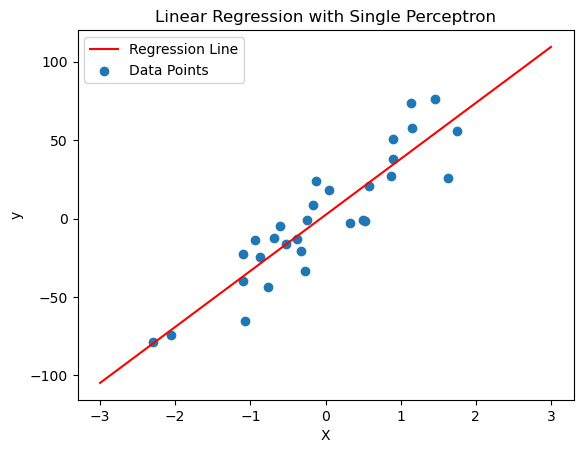

In [9]:
x = np.linspace(-3, 3, 50)
y_pred = W @ x.reshape(1, -1) + b

plt.plot(x, y_pred[0], c='r', label='Regression Line')
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Single Perceptron')
plt.legend()
plt.show()

### Neural Network Model with a Single Perceptron and Two Input Nodes

In [10]:
import seaborn as sns

from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('house_prices_train.csv', index_col='Id')

In [12]:
for column in df.columns:
    if np.sum(df[column].isna())/1460 > 0:
        print(f'{np.sum(df[column].isna())/1460 *100 :0.2f}% of "{column}" is null.')

17.74% of "LotFrontage" is null.
93.77% of "Alley" is null.
59.73% of "MasVnrType" is null.
0.55% of "MasVnrArea" is null.
2.53% of "BsmtQual" is null.
2.53% of "BsmtCond" is null.
2.60% of "BsmtExposure" is null.
2.53% of "BsmtFinType1" is null.
2.60% of "BsmtFinType2" is null.
0.07% of "Electrical" is null.
47.26% of "FireplaceQu" is null.
5.55% of "GarageType" is null.
5.55% of "GarageYrBlt" is null.
5.55% of "GarageFinish" is null.
5.55% of "GarageQual" is null.
5.55% of "GarageCond" is null.
99.52% of "PoolQC" is null.
80.75% of "Fence" is null.
96.30% of "MiscFeature" is null.


In [13]:
cols = []
for column in df.columns:
    if np.sum(df[column].isna())/1460 *100 > 6:
        cols.append(column)

df_new = df.drop(columns=cols)
df_new = df_new.dropna()
print(f'df.shape: {df.shape}, df_new.shape: {df_new.shape}')

df.shape: (1460, 80), df_new.shape: (1338, 73)


In [14]:
n_features = 2
df_new = pd.get_dummies(df_new, drop_first=True)
columns = df_new.corrwith(df_new['SalePrice']).abs().nlargest(n_features+1).keys()[1:]
columns

Index(['OverallQual', 'GrLivArea'], dtype='object')

In [15]:
X = df_new[columns]
y = df_new['SalePrice']

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

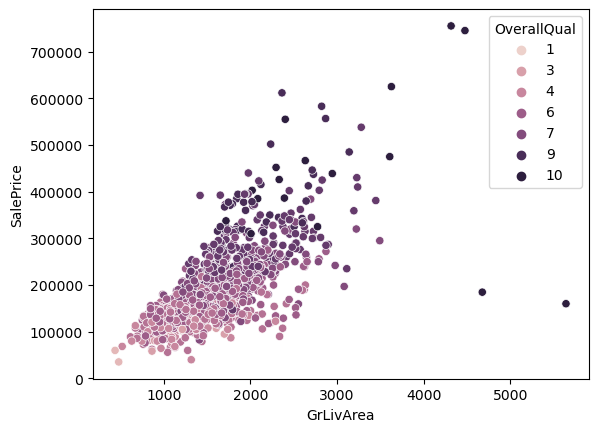

In [16]:
sns.scatterplot(data=df, x='GrLivArea', y=y, hue='OverallQual')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
X_train_norm = ((X_train - X.mean()) / X.std()).T.to_numpy()
X_test_norm = ((X_test - X.mean()) / X.std()).T.to_numpy()
y_train_norm = (y_train - y.mean()) / y.std()
y_train_norm = np.reshape(y_train_norm, (1, -1))
y_test = np.reshape(y_test, (1, -1))

In [19]:
LEARNING_RATE = 0.05
EPOCHS = 100
n_x = n_features     # number of inputs
n_y = 1              # number of outputs

W, b = nn_model(X_train_norm, y_train_norm, n_x, n_y, EPOCHS, LEARNING_RATE, print_cost=True)

Epoch:0, Cost: 0.4816306531429291
Epoch:10, Cost: 0.2400093823671341
Epoch:20, Cost: 0.1803579330444336
Epoch:30, Cost: 0.16321180760860443
Epoch:40, Cost: 0.15749457478523254
Epoch:50, Cost: 0.1553143560886383
Epoch:60, Cost: 0.1543733924627304
Epoch:70, Cost: 0.15391741693019867
Epoch:80, Cost: 0.15367276966571808
Epoch:90, Cost: 0.1535305678844452


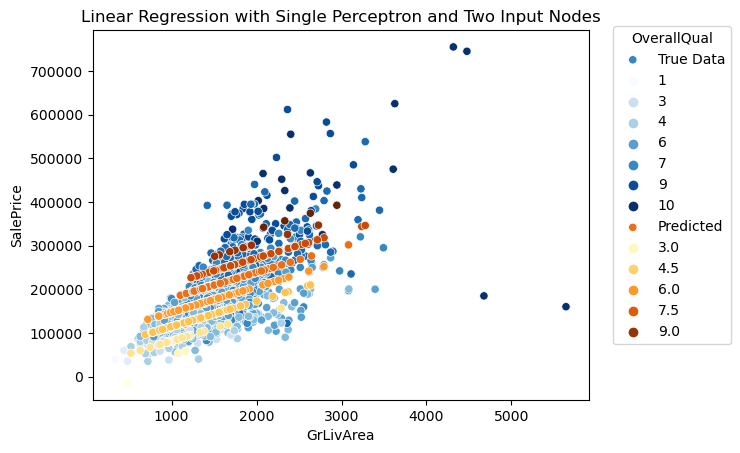

In [20]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='Blues', label='True Data')

y_values_norm = W @ X_test_norm + b 
y_values = y_values_norm * y.std() + y.mean()

df2 = pd.DataFrame(np.hstack([X_test, y_values.T]), columns=[*columns, 'SalePrice'])
sns.scatterplot(data=df2, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='YlOrBr', label='Predicted')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression with Single Perceptron and Two Input Nodes')
plt.legend(title='OverallQual',loc=(1.05, 0.15))
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test.T, y_values.T))
print(f'RMSE : {RMSE}')
print(f'R2 Score: {r2_score(y_test.T, y_values.T)}')

RMSE : 40482.6925034025
R2 Score: 0.7129309287327648
